Assignment 1
Idan Razy, 204475255
Asaf Wlodawer, 204233936

In [0]:
from __future__ import print_function

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
import seaborn as sns
import itertools

from keras.models import Model, Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, Flatten, Input, AvgPool2D,MaxPool2D,Dropout,BatchNormalization ,ZeroPadding2D
from keras.utils import to_categorical
from keras import callbacks

Using TensorFlow backend.


Importing the Cifar10 data from keras

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 66s 0us/step


Presenting the shape of the Cifar10 data

In [0]:
#lets look at the data:
print('X_train shape is: {} \n\
y_train shape is: {}'.format(X_train.shape,y_train.shape))
print()
print('X_test shape is: {} \n\
y_test shape is: {}'.format(X_test.shape,y_test.shape))

X_train shape is: (50000, 32, 32, 3) 
y_train shape is: (50000, 1)

X_test shape is: (10000, 32, 32, 3) 
y_test shape is: (10000, 1)


Present the data from Cifar10 with the relavent classification

In [0]:
def plot_multiple_imgs(X,y,nrow=2,ncol=2,figsize=(13,7),preds=None,skip=0):
    fig,ax = plt.subplots(nrows=nrow,ncols=ncol,figsize=figsize)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(nrow*ncol):
        ax[i//ncol,i%ncol].imshow(X[skip+i],cmap='binary')
        ax[i//ncol,i%ncol].set_xticks([])
        ax[i//ncol,i%ncol].set_yticks([])
        if preds is not None:
            ax[i//ncol,i%ncol].text(0.85, 0.1, str(preds[skip+i]), transform=ax[i//ncol,i%ncol].transAxes,
                                   color='green' if y[skip+i]==preds[skip+i] else 'red',weight='bold')
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
        else:
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
    plt.show()

In [0]:
def present_matrix(model, XTest):
  preds = model.predict(np.reshape(XTest,(10000,32,32,3)))
  pred_cat = np.argmax(preds,axis=1)
  print('')
  print(confusion_matrix(y_test,pred_cat))
  print()
  print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
  sns.heatmap(confusion_matrix(y_test,pred_cat),cmap='Greens',annot=True, fmt='d')
  plt.xlabel('Prediction')
  plt.ylabel('True label')
  plt.title('lassification results on test set')
  return preds

In [0]:
def plot_model_lost(history):
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
def plot_models_accuracy(history):
  plt.figure()
  plt.plot(history.history['acc'],label = 'train')
  plt.plot(history.history['val_acc'],label = 'test')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(loc='lower right')
  plt.show()

In [0]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
def set_callbacks(description='run1',es_patience=10,rlop_patience=7,tb_base_logdir='./logs/'):
    import os
    cp = ModelCheckpoint('best_model_weights_{}.h5'.format(description),save_best_only=True)
    es = EarlyStopping(patience=es_patience,monitor='val_acc')    
    rlop = ReduceLROnPlateau(patience=rlop_patience)
    tb = TensorBoard(log_dir='{}{}'.format(tb_base_logdir,description))
    cb = [cp,es,rlop,tb]
    return cb

### Trying first models


Model 1:

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D())
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 16)        4624      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 10, 16)        0         
__________

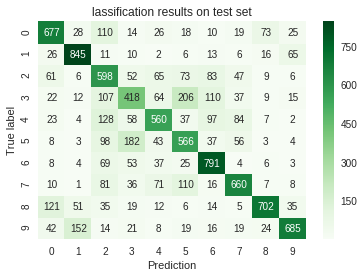

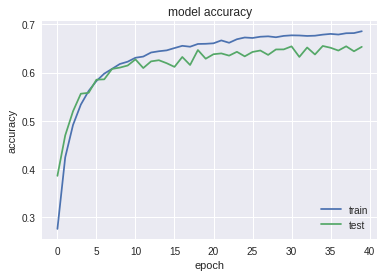

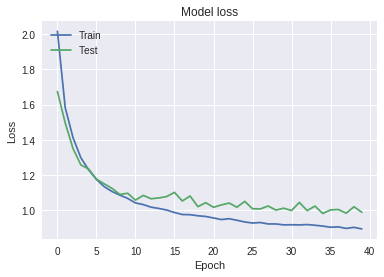

In [0]:
model.summary()
history = model.fit(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train),validation_split=0.2,shuffle=True,epochs=40, batch_size = 32)
present_matrix(model, X_test)
plot_models_accuracy(history)
plot_model_lost(history)

Model 2:

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D())
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 64)          102464    
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 64)          0         
__________

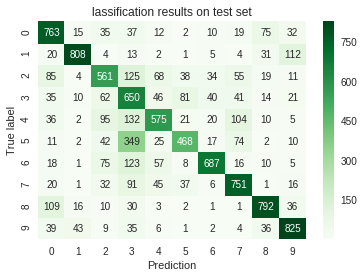

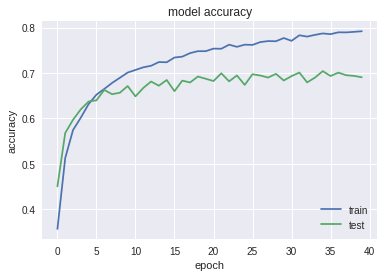

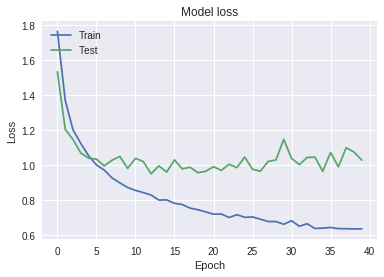

In [0]:
model.summary()
history = model.fit(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train),validation_split=0.2,shuffle=True,epochs=40, batch_size = 32)
present_matrix(model, X_test)
plot_models_accuracy(history)
plot_model_lost(history)

### After testing simple models we tried to add normalization and padding

Model 3:

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D())
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 6, 6, 64)          102464    
__________

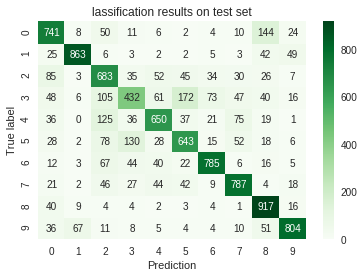

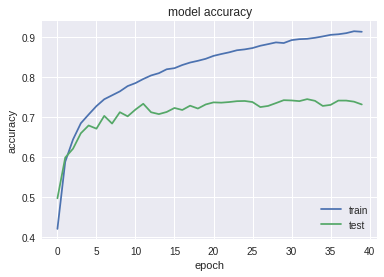

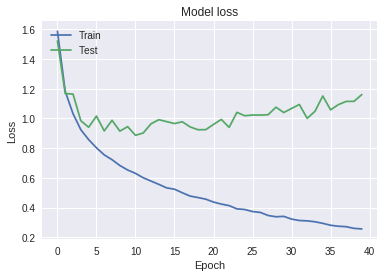

In [0]:
model.summary()
history = model.fit(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train),validation_split=0.2,shuffle=True,epochs=40, batch_size = 32)
present_matrix(model, X_test)
plot_models_accuracy(history)
plot_model_lost(history)

Model 4:

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D())
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Dropout(0.2))
model.add(ZeroPadding2D(padding=((1, 1),(1,1))))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 6, 6, 64)          102464    
__________

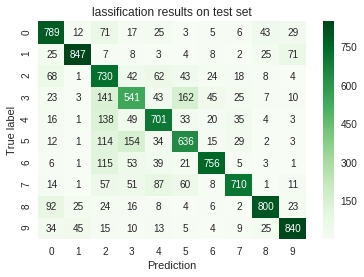

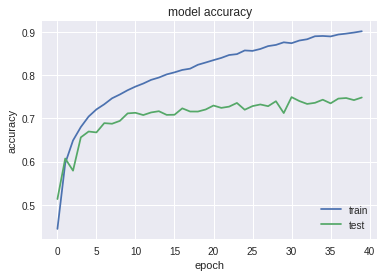

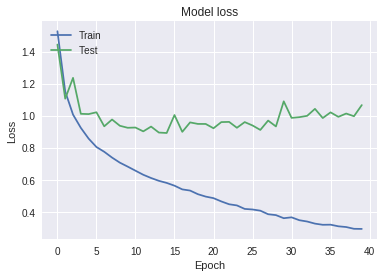

In [0]:
model.summary()
history = model.fit(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train),validation_split=0.2,shuffle=True,epochs=40, batch_size = 32)
present_matrix(model, X_test)
plot_models_accuracy(history)
plot_model_lost(history)

Model 5:

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D())
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(ZeroPadding2D(padding=((1, 1),(1,1))))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 6, 6, 64)          102464    
__________

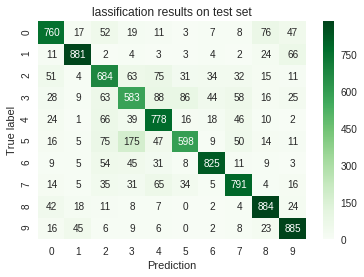

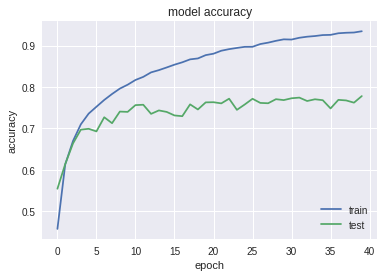

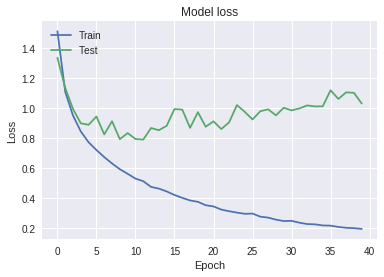

In [0]:
model.summary()
history = model.fit(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train),validation_split=0.2,shuffle=True,epochs=40, batch_size = 32)
present_matrix(model, X_test)
plot_models_accuracy(history)
plot_model_lost(history)

### To get much more significant improvement we tried to preprocess the data with augmantation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
X_test_normalized=X_test/255

Model 6:

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D())
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(ZeroPadding2D(padding=((1, 1),(1,1))))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

datagen = ImageDataGenerator(
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_18 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 6, 6, 64)          102464    
__________

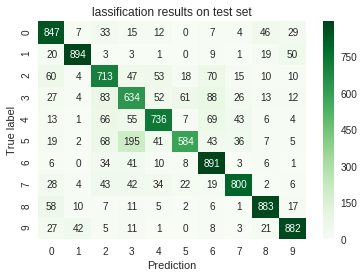

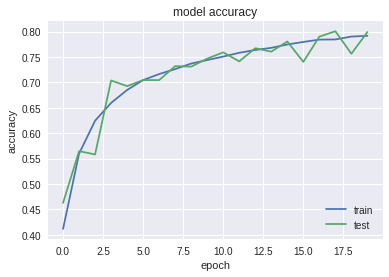

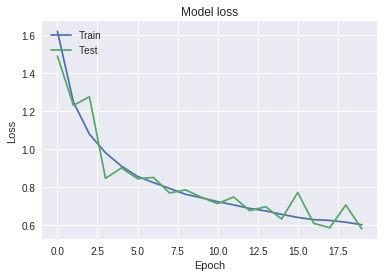

In [0]:
model.summary()
history = model.fit_generator(datagen.flow(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train), batch_size=32),
                    validation_data=datagen.flow(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train)),
                    steps_per_epoch=len(X_train)//32,validation_steps = 2500, epochs=20)
present_matrix(model, X_test_normalized)
plot_models_accuracy(history)
plot_model_lost(history)

Model 7:

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D())
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(ZeroPadding2D(padding=((1, 1),(1,1))))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

datagen = ImageDataGenerator(
    zoom_range=0.3,
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_21 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 6, 6, 64)          102464    
__________

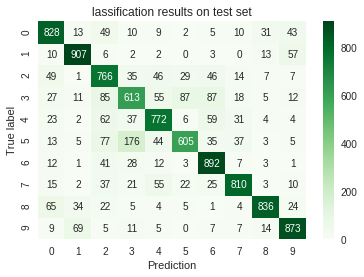

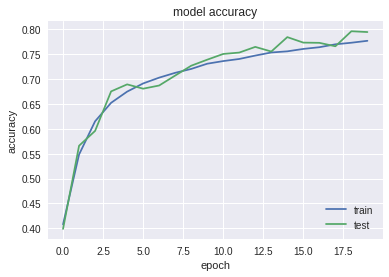

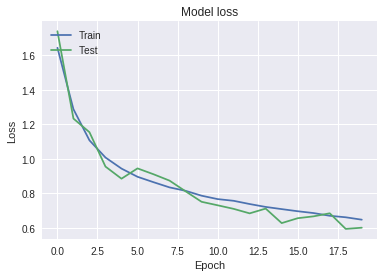

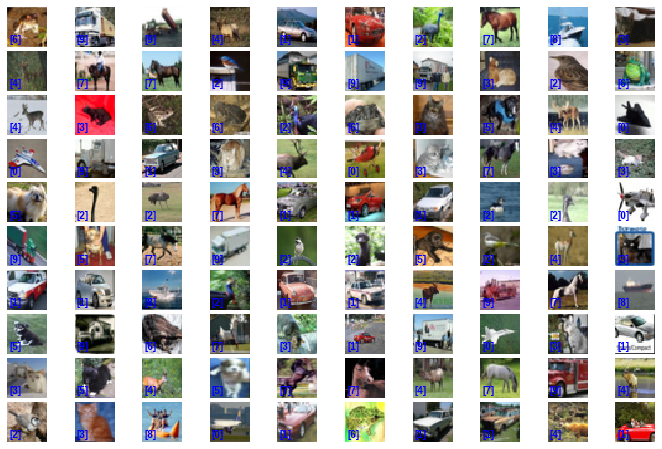

In [0]:
model.summary()
history = model.fit_generator(datagen.flow(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train), batch_size=32),
                    validation_data=datagen.flow(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train)),
                    steps_per_epoch=len(X_train)//32,validation_steps = 2500, epochs=20)
pred = present_matrix(model, X_test_normalized)
plot_models_accuracy(history)
plot_model_lost(history)
plot_multiple_imgs(X_train/255,y_train,10,10,(12,8),pred, skip=0)

Model 8:

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D())
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(ZeroPadding2D(padding=((1, 1),(1,1))))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

datagen = ImageDataGenerator(
    zoom_range=0.5,
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_30 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 6, 6, 64)          102464    
__________

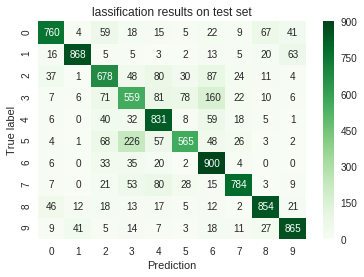

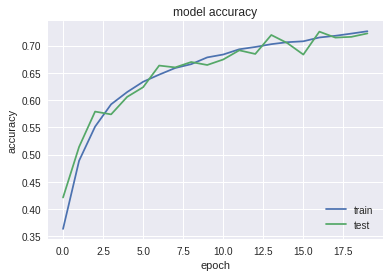

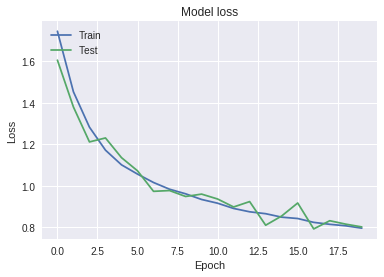

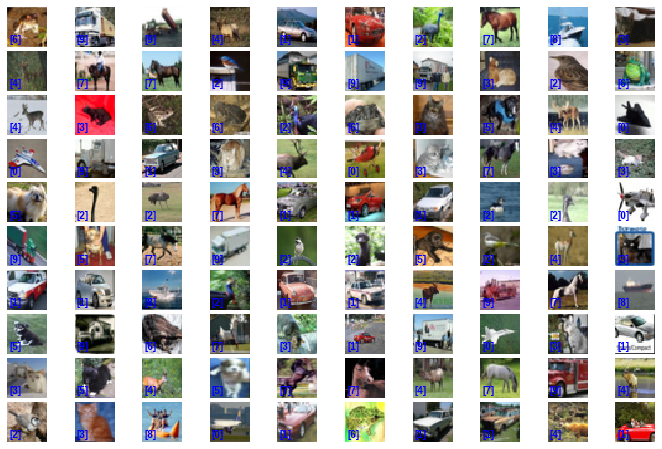

In [0]:
model.summary()
history = model.fit_generator(datagen.flow(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train), batch_size=32),
                    validation_data=datagen.flow(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train)),
                    steps_per_epoch=len(X_train)//32,validation_steps = 2500, epochs=20)
pred = present_matrix(model, X_test_normalized)
plot_models_accuracy(history)
plot_model_lost(history)
plot_multiple_imgs(X_train/255,y_train,10,10,(12,8),pred, skip=0)

plot models fit epoch --> val_acc
save each model.fit in history var

In [0]:
#history = model.fit(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train),validation_split=0.2,shuffle=True,epochs=5)
#history1 = model1.fit(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train),validation_split=0.2,shuffle=True,epochs=5)


def plot_models_accuracy(history,model_name):
  plt.figure()
  plt.plot(history.history['acc'],label = 'train')
  plt.plot(history.history['val_acc'],label = 'test')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(loc='lower right')
  #plot_models_accuracy(history,'model1')
  # plot_models_accuracy(history1,'model2')
  plt.show()
  
# plot_models_accuracy(history,'1')
# plot_models_accuracy(history1,'2')

### plot train vs test lost function

In [0]:
def plot_model_lost(history,model_name):
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
def save_model(model,filename):
    # this is a helper function used to save a keras NN model architecture and weights
    json_string = model.to_json()
    if not os.path.isdir('cache'):
        os.mkdir('cache')
    open(os.path.join('cache', filename+'_architecture.json'), 'w').write(json_string)
    model.save_weights(os.path.join('cache', filename+'_model_weights.h5'), overwrite=True)
    from google.colab import files
    files.download(r'cache/'+filename+'_architecture.json')
    files.download(r'cache/'+filename+'_model_weights.h5')
    
    
def read_model(filename):
    # this is a helper function used to restore a keras NN model architecture and weights
    model = model_from_json(open(os.path.join('cache', filename+'_architecture.json')).read())
    model.load_weights(os.path.join('cache', filename+'_model_weights.h5'))
    return model

In [0]:
import os
save_model(model,"model")


In [0]:
 def plot_conf_matrix(model):
    X_test_nor = X_test/255.0
    preds = model.predict(np.reshape(X_test_nor,(10000,32,32,3)))
    pred_cat = np.argmax(preds,axis=1)
    print('')
    print(confusion_matrix(y_test,pred_cat))
    print()
    print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
    sns.heatmap(confusion_matrix(y_test,pred_cat),cmap='Greens',annot=True, fmt='d')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title('lassification results on test set')

**3)workwith transport layer**


- first model 

In [0]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.applications.vgg16 import preprocess_input
cb =  set_callbacks()
X_train_nor = X_train/255
vgg16 = VGG16(weights='imagenet', include_top=False ,input_shape=(32,32,3))
# let's add a fully-connected layer
x = Flatten()(vgg16.output)
x = Dense(1024, activation='relu', name='fc1')(x)
predictions = Dense(10, activation='softmax')(x)
for layer in vgg16.layers:
    layer.trainable = False
model = Model(inputs=vgg16.input, outputs=predictions)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
h =  model.fit(np.reshape(X_train_nor,(50000,32,32,3)),to_categorical(y_train),validation_split=0.2,shuffle=True,epochs=20 , callbacks= cb) #np.reshape(X_train,(50000,32,32,3))
plot_models_accuracy(h,'vgg16')
plot_model_lost(h,'vgg16')
print_confusion_matrix(my_model)

**best model** 85% acc on test and with data agaugmentation 87.8%

58892288/58889256 [==============================] - 1s 0us/step
Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 41s 1ms/step - loss: 1.2833 - acc: 0.5592 - val_loss: 1.4266 - val_acc: 0.5851
Epoch 2/20
35000/35000 [==============================] - 37s 1ms/step - loss: 0.8949 - acc: 0.7012 - val_loss: 0.7666 - val_acc: 0.7375
Epoch 3/20
35000/35000 [==============================] - 37s 1ms/step - loss: 0.7225 - acc: 0.7551 - val_loss: 0.6870 - val_acc: 0.7731
Epoch 4/20
35000/35000 [==============================] - 37s 1ms/step - loss: 0.5814 - acc: 0.8039 - val_loss: 0.7397 - val_acc: 0.7727
Epoch 5/20
35000/35000 [==============================] - 37s 1ms/step - loss: 0.4862 - acc: 0.8342 - val_loss: 0.6057 - val_acc: 0.8059
Epoch 6/20
35000/35000 [==============================] - 37s 1ms/step - loss: 0.4040 - acc: 0.8602 - val_loss: 0.7165 - val_acc: 0.7846
Epoch 7/20
35000/35000 [==============================] - 37s 1

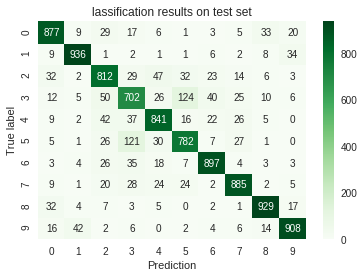

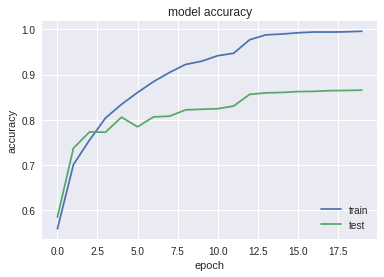

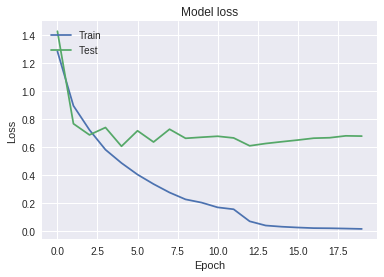

In [0]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras import optimizers
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
cb =  set_callbacks()
x_train_nor = X_train/255.0

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))
#Use the generated model 
output_vgg16_conv = model_vgg16_conv.get_layer('block3_pool').output
#Add the fully-connected layers 
x= BatchNormalization()(output_vgg16_conv)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(10, activation='softmax')(x)


my_model = Model(model_vgg16_conv.input, x)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
my_model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
h =  my_model.fit(x_train_nor,to_categorical(y_train),validation_split=0.3,shuffle=True,epochs=20,callbacks= cb) #np.reshape(X_train,(50000,32,32,3))
plot_conf_matrix(my_model)
plot_models_accuracy(h,'vgg16')
plot_model_lost(h,'vgg16')



[[883  10  30  13   5   4   7   6  29  13]
 [  9 930   3   2   1   3   2   0  10  40]
 [ 33   3 798  41  50  25  25  14   7   4]
 [ 13   3  44 696  41 121  44  22  10   6]
 [ 12   1  25  39 861  16  23  18   4   1]
 [  9   2  26 121  25 780   8  27   0   2]
 [  5   1  17  38  17  13 899   2   6   2]
 [ 10   0  23  30  27  19   5 879   2   5]
 [ 36  10  10   5   6   0   3   2 916  12]
 [ 11  45   4   8   3   2   4   6  13 904]]

model accuracy on test set is: 85.46000000000001%


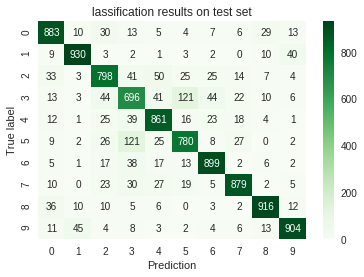

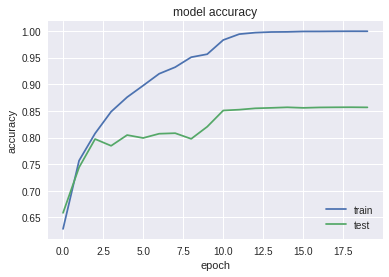

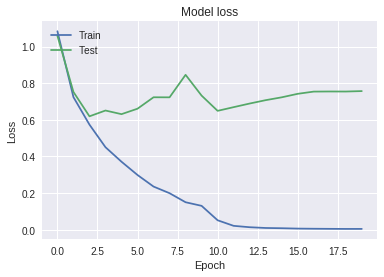

In [0]:
plot_conf_matrix(my_model)
plot_models_accuracy(h,'vgg16')
plot_model_lost(h,'vgg16')


**best model 85%** acc on test and with data agaugmentation 87.8%

In [0]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras import optimizers
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
cb =  set_callbacks()
x_train_nor = X_train/255.0

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))
#Use the generated model 
output_vgg16_conv = model_vgg16_conv.get_layer('block3_pool').output
#Add the fully-connected layers 
x= BatchNormalization()(output_vgg16_conv)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(10, activation='softmax')(x)


my_model = Model(model_vgg16_conv.input, x)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
my_model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
h =  my_model.fit(x_train_nor,to_categorical(y_train),validation_split=0.3,shuffle=True,epochs=20,callbacks= cb) #np.reshape(X_train,(50000,32,32,3))
plot_conf_matrix(my_model)
plot_models_accuracy(h,'vgg16')
plot_model_lost(h,'vgg16')

**VGG with data augmentation** 

In [0]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras import optimizers
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
cb =  set_callbacks()
#x_train = preprocess_input(np.reshape(X_train,(50000,32,32,3)))\
#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))
#Use the generated model 
output_vgg16_conv = model_vgg16_conv.get_layer('block3_pool').output
#Add the fully-connected layers 
x= BatchNormalization()(output_vgg16_conv)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax')(x)


my_model_agg = Model(model_vgg16_conv.input, x)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
my_model_agg.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
#h =  my_model.fit(x_train_nor,to_categorical(y_train),validation_split=0.3,shuffle=True,epochs=40,callbacks= cb) #np.reshape(X_train,(50000,32,32,3))
datagen = ImageDataGenerator(
    zoom_range=0.1,
    fill_mode='reflect',
    rescale=1./255,
    horizontal_flip=True)

h = my_model_agg.fit_generator(datagen.flow(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train), batch_size=32),
                    validation_data=datagen.flow(np.reshape(X_train,(50000,32,32,3)),to_categorical(y_train)),
                    steps_per_epoch=len(X_train)//32,validation_steps = len(X_train)/15, epochs=20)

plot_conf_matrix(my_model_agg)
plot_models_accuracy(h,'vgg16')
plot_model_lost(h,'vgg16')

58892288/58889256 [==============================] - 6s 0us/step
Epoch 1/20
1562/1562 [==============================] - 114s 73ms/step - loss: 1.1569 - acc: 0.6058 - val_loss: 0.8299 - val_acc: 0.7187
Epoch 2/20
1562/1562 [==============================] - 111s 71ms/step - loss: 0.8090 - acc: 0.7303 - val_loss: 0.7867 - val_acc: 0.7413
Epoch 3/20
1562/1562 [==============================] - 110s 70ms/step - loss: 0.6740 - acc: 0.7734 - val_loss: 0.5482 - val_acc: 0.8123
Epoch 4/20
1562/1562 [==============================] - 110s 71ms/step - loss: 0.5766 - acc: 0.8059 - val_loss: 0.5205 - val_acc: 0.8250
Epoch 5/20
1562/1562 [==============================] - 110s 71ms/step - loss: 0.5029 - acc: 0.8329 - val_loss: 0.4295 - val_acc: 0.8530
Epoch 6/20
1562/1562 [==============================] - 110s 70ms/step - loss: 0.4496 - acc: 0.8484 - val_loss: 0.3556 - val_acc: 0.8778
Epoch 7/20
1562/1562 [==============================] - 109s 70ms/step - loss: 0.4020 - acc: 0.8626 - val_loss: 0

NameError: ignored


[[848  10  29  15  23   0   3   6  38  28]
 [  2 940   2   4   0   1   0   0   4  47]
 [ 25   1 835  24  51  16  33   5   4   6]
 [ 12   7  38 736  62  89  42   7   3   4]
 [  2   1  25  18 924   6  16   6   1   1]
 [  3   3  29 116  53 756  24  11   2   3]
 [  4   0  30  33  13   3 915   1   0   1]
 [  5   2  24  25  45  19   4 874   0   2]
 [ 15  10   4   5   8   2   3   0 930  23]
 [  5  28   3   6   3   0   3   1   8 943]]

model accuracy on test set is: 87.01%


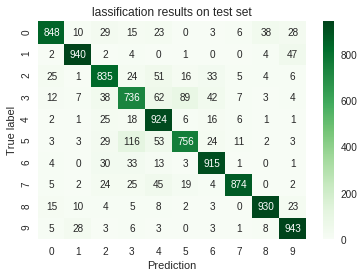

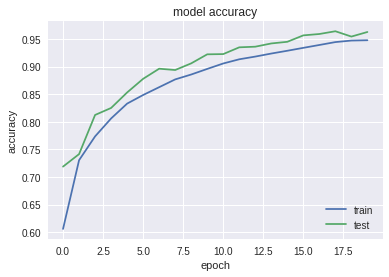

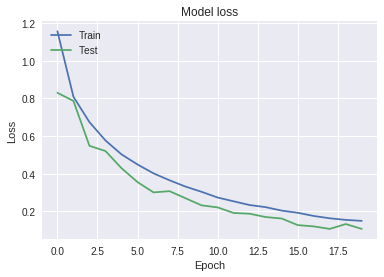

In [0]:
plot_conf_matrix(my_model_agg)
plot_models_accuracy(h,'vgg16')
plot_model_lost(h,'vgg16')

**transfer model 2:**

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 30s 760us/step - loss: 4.8953 - acc: 0.4981 - val_loss: 1.2778 - val_acc: 0.5783
Epoch 2/20
40000/40000 [==============================] - 30s 743us/step - loss: 1.5237 - acc: 0.5823 - val_loss: 1.2012 - val_acc: 0.6003
Epoch 3/20
40000/40000 [==============================] - 30s 745us/step - loss: 1.4539 - acc: 0.6084 - val_loss: 1.2670 - val_acc: 0.6034
Epoch 4/20
40000/40000 [==============================] - 30s 743us/step - loss: 1.4560 - acc: 0.6210 - val_loss: 1.2798 - val_acc: 0.6064
Epoch 5/20
40000/40000 [==============================] - 30s 742us/step - loss: 1.4476 - acc: 0.6310 - val_loss: 1.2953 - val_acc: 0.6147
Epoch 6/20
40000/40000 [==============================] - 30s 742us/step - loss: 1.4487 - acc: 0.6400 - val_loss: 1.3354 - val_acc: 0.6050
Epoch 7/20
40000/40000 [==============================] - 30s 743us/step - loss: 1.4655 - acc: 0.6493 - val_loss: 1.

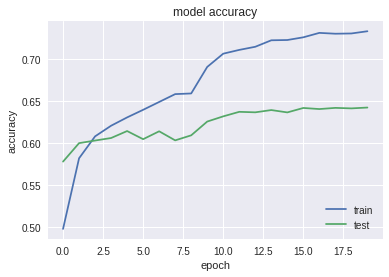

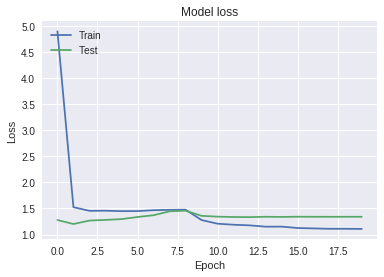

In [0]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.applications.vgg16 import preprocess_input
import numpy as np
cb =  set_callbacks()
x_train = preprocess_input(np.reshape(X_train,(50000,32,32,3)))
vgg16 = VGG16(weights='imagenet', include_top=False ,input_shape=(32,32,3))
x = vgg16.output
# let's add a fully-connected layer
#x = Flatten()(x)
#x= GlobalMaxPooling2D()(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
for layer in vgg16.layers:
    layer.trainable = False
model = Model(inputs=vgg16.input, outputs=predictions )
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
h =  model.fit(x_train,to_categorical(y_train),validation_split=0.2,shuffle=True,epochs=20  , callbacks= cb) #np.reshape(X_train,(50000,32,32,3))
plot_models_accuracy(h,'vgg16')
plot_model_lost(h,'vgg16')



[[694  25  60  28  33   3  11  22  85  39]
 [ 20 675   6  31  16  10   3  17  63 159]
 [ 51   8 533  76 142  62  61  44  13  10]
 [ 16  17  59 485  81 174  66  57  12  33]
 [  8   6  64  52 660  52  43  93  15   7]
 [  6  10  53 180  65 569  31  70   7   9]
 [ 10   5  75  77 137  44 627  12   5   8]
 [ 25   9  26  40 102  66   5 696  10  21]
 [ 77  36  12  11  30   8   4  11 768  43]
 [ 51 107   1  30  20  13   3  33  50 692]]

model accuracy on test set is: 63.99%


Text(0.5,1,'lassification results on test set')

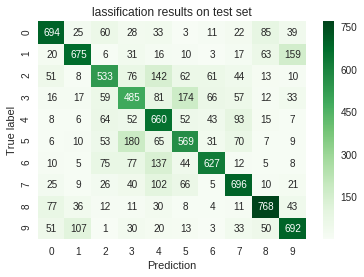

In [0]:
x_test_pre = preprocess_input(np.reshape(X_test,(10000,32,32,3)))
preds = model.predict(np.reshape(x_test_pre,(10000,32,32,3)))
pred_cat = np.argmax(preds,axis=1)
print('')
print(confusion_matrix(y_test,pred_cat))
print()
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
sns.heatmap(confusion_matrix(y_test,pred_cat),cmap='Greens',annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('lassification results on test set')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 64)          102464    
__________

In [0]:
X_test_preprocess = preprocess_input(np.reshape(X_test,(10000,32,32,3)))
preds = model.predict(np.reshape(X_test_preprocess,(10000,32,32,3)))
pred_cat = np.argmax(preds,axis=1)
print('')
print(confusion_matrix(y_test,pred_cat))
print()
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
sns.heatmap(confusion_matrix(y_test,pred_cat),cmap='Greens',annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('lassification results on test set')

**use VGG16 to extarct featuer to decision tree**

(50000, 256)

[[738  15  63  47  27   9  12  17  44  28]
 [ 16 862   9  11   2   4  15   5  19  57]
 [ 62   7 645  68  73  46  51  32  13   3]
 [ 29  11  72 573  51 142  54  38  15  15]
 [ 22   2  72  59 701  41  36  53  12   2]
 [ 10   7  60 149  39 658  33  30   8   6]
 [ 14   9  58  58  21  34 782   9  10   5]
 [ 19   4  33  43  52  39  10 781   1  18]
 [ 50  27  14  16   3   9   6   1 844  30]
 [ 26  75   4  16   4  10  12   7  29 817]]

model accuracy on test set is: 74.00999999999999%


Text(0.5,1,'d_tree with vgg16')

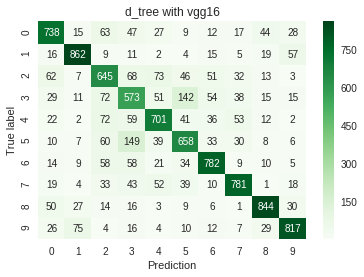

In [0]:
from sklearn import tree
x_train_nor = X_train/255 
X_test_nor = X_test/255
clf = tree.DecisionTreeClassifier()
vgg16_feature_list = []
x =  my_model.layers[-2].output
base_model = Model(inputs=my_model.input, outputs=x)
vgg16_feature_np = base_model.predict(x_train_nor)
print (vgg16_feature_np.shape)
vg16_x_test = base_model.predict(X_test_nor)
clf.fit(vgg16_feature_np, y_train)
pred_cat = clf.predict(vg16_x_test)
#pred_cat = np.argmax(preds,axis=1)
print('')
print(confusion_matrix(y_test,pred_cat))
print()
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
sns.heatmap(confusion_matrix(y_test,pred_cat),cmap='Greens',annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('d_tree with vgg16')


SVM

(50000, 256)
(10000, 256)
(50000, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[[883   9  27  15   6   0   4   9  33  14]
 [ 10 918   2   6   0   1   5   0  17  41]
 [ 43   4 785  50  42  27  28  16   3   2]
 [ 16   5  42 728  36  98  38  19  12   6]
 [ 11   3  26  46 852  14  20  24   4   0]
 [  3   5  28 134  30 769   9  18   1   3]
 [  6   4  20  35  14  12 900   3   4   2]
 [  7   2  16  28  26  31   2 884   2   2]
 [ 38  11   4   9   2   1   4   0 922   9]
 [ 15  52   4   9   2   2   3   4  12 897]]

model accuracy on test set is: 85.38%


Text(0.5,1,'d_tree with vgg16')

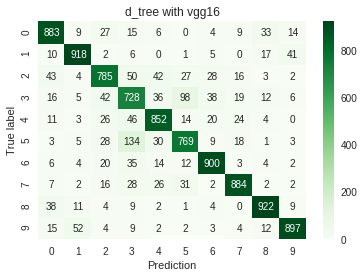

In [0]:
from sklearn.svm import SVC
svc = SVC(max_iter=10000)
x_train_nor = X_train/255 
X_test_nor = X_test/255
x =  my_model.layers[-2].output
base_model = Model(inputs=my_model.input, outputs=x)
vgg16_feature_np = base_model.predict(x_train_nor)
vg16_x_test = base_model.predict(X_test_nor)
print(vgg16_feature_np.shape)
print(vg16_x_test.shape)
print(y_train.shape)
svc.fit(vgg16_feature_np, y_train)
pred_cat = svc.predict(vg16_x_test)
print('')
print(confusion_matrix(y_test,pred_cat))
print()
print('model accuracy on test set is: {}%'.format(accuracy_score(y_test,pred_cat)*100))
sns.heatmap(confusion_matrix(y_test,pred_cat),cmap='Greens',annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('d_tree with vgg16')

In [0]:
import PIL

def read_and_resize_single_img(filename,nrow=224,ncol=224,channels=3):
    from scipy import misc
    arr = misc.imread(filename)
    arr = misc.imresize(arr,size=(nrow,ncol,channels))
    return arr

img = read_and_resize_single_img('./course_materials/lecture 2/one.png',28,28,1)
plt.imshow(img)

upload data to notebook

In [0]:
from google.colab import files
uploaded = files.upload()
# import zipfile
# import io
# data = zipfile.ZipFile(io.BytesIO(uploaded['dataDir.zip']), 'r')
# data.extractall()
# data.printdir()

Saving airplane.png to airplane.png
Saving bojack.jpg to bojack.jpg
Saving cat.jpg to cat.jpg
Saving frog.png to frog.png
Saving truck.jpg to truck.jpg


In [0]:
import os
from scipy import misc
from PIL import Image
import cv2
from scipy import misc

items = os.listdir('/content')
print (items)
list_of_arrays = []
list_of_arrays.append(cv2.imread('/content/airplane.png'))
dog = cv2.imread('/content/dog.jpeg')
dog = misc.imresize(dog,size=(32,32,3))
list_of_arrays.append(dog)
cat = cv2.imread('/content/cat.jpg')
cat = misc.imresize(cat,size=(32,32,3))
list_of_arrays.append(cat) 
list_of_arrays.append(cv2.imread('/content/frog.png'))
boj = cv2.imread('/content/bojack.jpg')
boj = misc.imresize(boj,size=(32,32,3))
list_of_arrays.append(boj) 
truck = cv2.imread('/content/truck.jpg')
truck = misc.imresize(truck,size=(32,32,3))
list_of_arrays.append(truck) 
arr = np.asarray(list_of_arrays)
print (arr.shape)










['.config', 'sample_data', 'truck.jpg', 'logs', 'best_model_weights_run1.h5', 'airplane.png', 'frog.png', 'cat.jpg', 'dog.jpeg', 'bojack.jpg']
(6, 32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


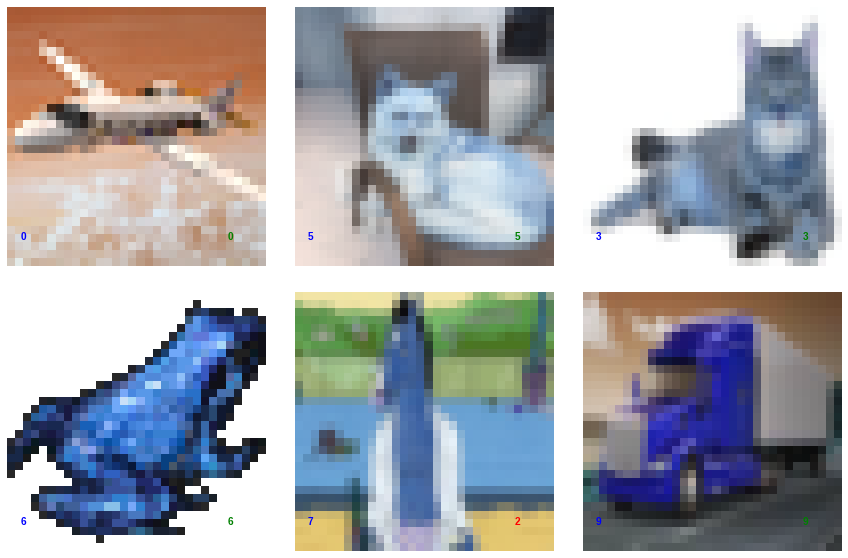

In [0]:

y = [0,5,3,6,7,9]
arr_nor = arr/255.0
preds = my_model.predict(arr_nor)
pred_cat = np.argmax(preds,axis=1)
plot_multiple_imgs(arr,y,nrow=2,ncol=3,figsize=(15,10),preds=pred_cat,skip=0)